<h2 style="font-weight: 700; text-align: center">Image Enhancement - 1 (Point Processing - 1)</h2>

#### Required Libraries

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#### Color to GrayScale Image for further processing

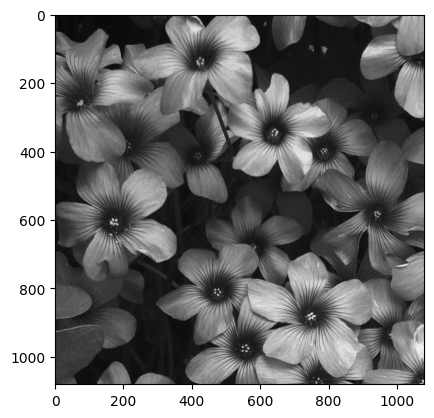

In [2]:
img = cv.imread("../Sample Images/Oxalis.jpg")
# print("Original image data (read using cv2 i.e BGR), 1st row, first 5 pixels\n", img[0][:5])
img_grayed = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# print("Grayed image, 1st row, first 5 pixels\n", img_grayed[0][:5])
plt.imshow(img_grayed, cmap="gray")
# cmap is important otherwise matplotlib is using green hues for the singular values we are getting after converting to grayscale

#### Utility Function - Matplot the output(s)

In [3]:
def matplot_images(*imgs, titles):
  fig = plt.figure(figsize=(15, 7))
  columns = len(imgs)
  for i in range(columns):
    fig.add_subplot(1, columns, i + 1)
    plt.imshow(imgs[i], cmap="gray")
    plt.title(titles[i])

#### Digital Negative

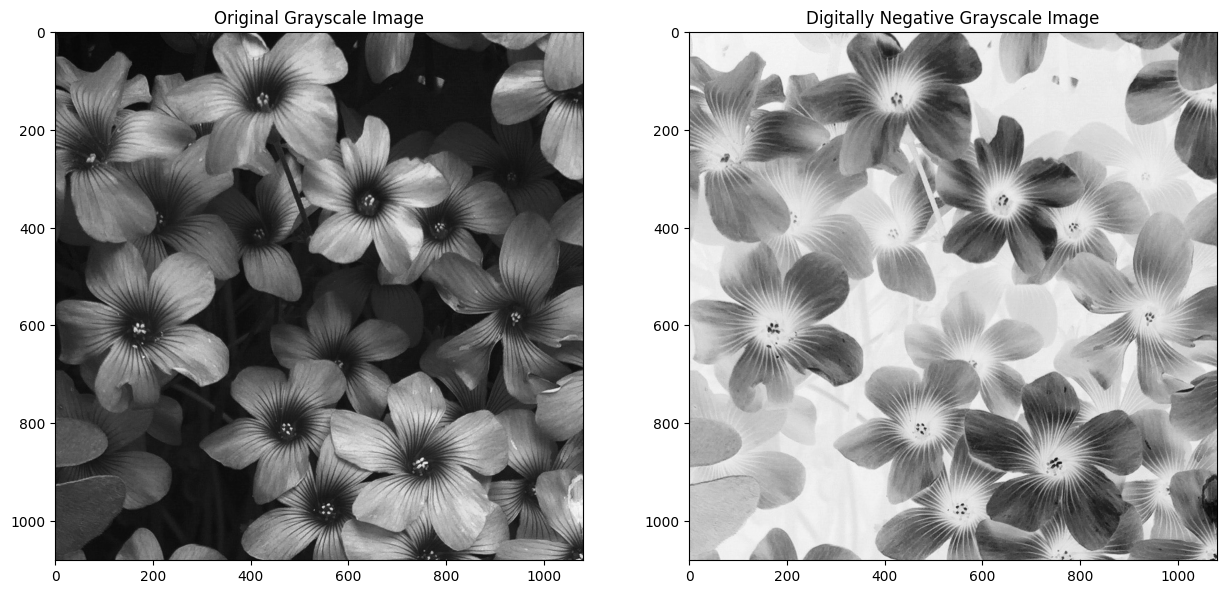

In [4]:
def digital_negative(og_grayscale, show_plot: bool = False):
  neg = [[255 - y for y in x] for x in og_grayscale]
  if show_plot:
    matplot_images(og_grayscale, neg, titles=["Original Grayscale Image", "Digitally Negative Grayscale Image"])

digital_negative(img_grayed, True)

#### Thresholding

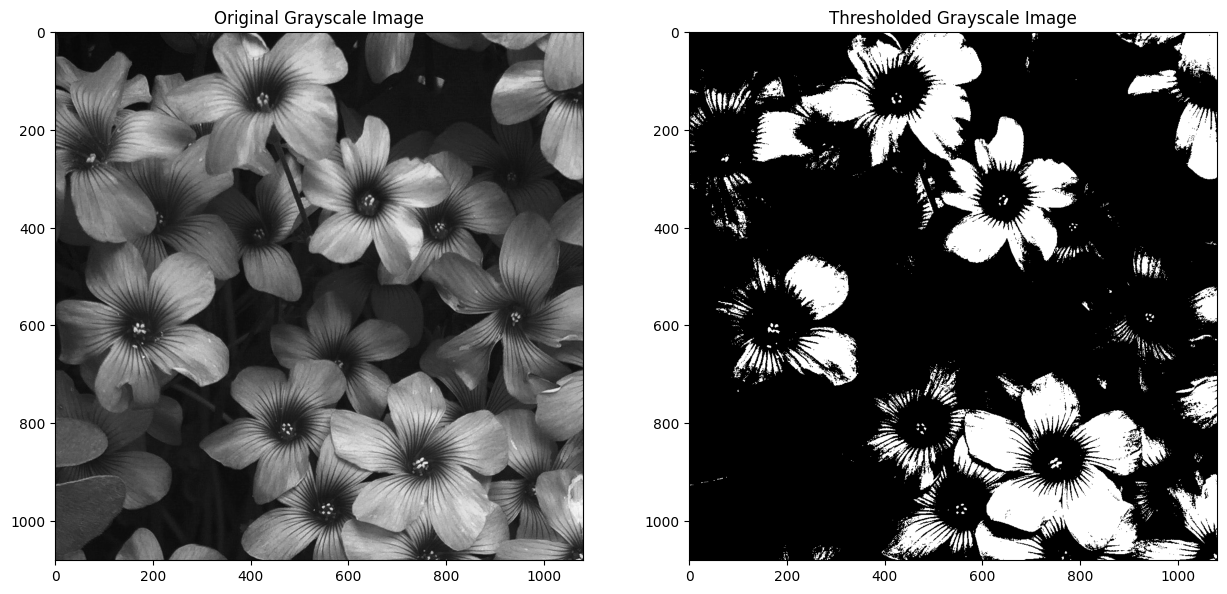

In [5]:
def thresholder(og_gs, th = 30, show_plot: bool = False):
  thresholded = [[0 if y < th else 255 for y in x]for x in og_gs]
  if show_plot:
    matplot_images(og_gs, thresholded, titles=["Original Grayscale Image", "Thresholded Grayscale Image"])
thresholder(img_grayed, 128, True)

#### Gray Level Slicing

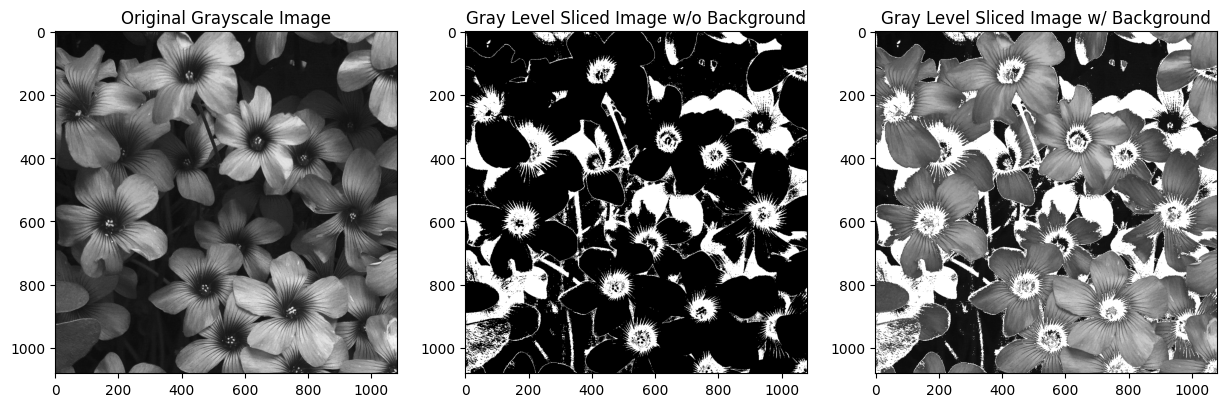

In [6]:
def gray_level_slicing(og_gs, lb, ub, show_plot: bool = False):
  gl_sliced_no_bg = [[255 if lb <= y < ub  else 0 for y in x] for x in og_gs]
  gl_sliced_w_bg = [[255 if lb < y <= ub else y for y in x] for x in og_gs]
  if show_plot:
    matplot_images(og_gs, gl_sliced_no_bg, gl_sliced_w_bg, titles=["Original Grayscale Image", "Gray Level Sliced Image w/o Background", "Gray Level Sliced Image w/ Background"])
gray_level_slicing(img_grayed, 30, 60, True)

#### Conclusion

- It is observed that Digital Negation on a grayscale image swaps the gray values with their corresponding "mirror" values.
- Thresholding can be used to highlight gray values in an image above the threshold.
- Gray level slicing w/o background works similarly to Thresholding but it uses a range rather than a singular threshold to set the values in range to maximum and rest to 0.
- Gray level slicing w/ background does not change the original image pixels which don't fall into the range specified. So it can be used to highlight values in image "relative" to the original image.  